<a href="https://colab.research.google.com/github/seawavve/CNN_wavve/blob/main/predictionCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np 

print('Python version : ', sys.version)
print('Keras version : ', keras.__version__)

img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10
epochs = 5
filename='checkpoint.h5'.format(epochs)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',  score[0])
print('Test accuracy:', score[1])
model.save('MNIST_CNN_model.h5')

Python version :  3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
Keras version :  2.4.3
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              12545000  
_________________________________________________________________
dense_3 (Dense)    

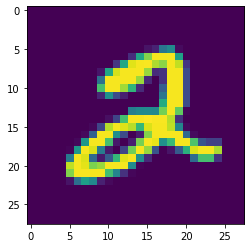

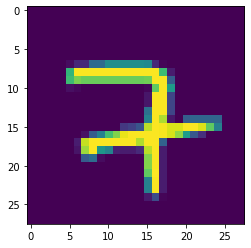

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# A few random samples
use_samples = [5, 38]
samples_to_predict = []

# Generate plots for samples
for sample in use_samples:
  # Generate a plot
  reshaped_image = x_train[sample].reshape((28,28))
  plt.imshow(reshaped_image)
  plt.show()
  samples_to_predict.append(x_train[sample])

In [9]:
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)

(2, 28, 28, 1)


In [10]:
predictions = model.predict(samples_to_predict)
print(predictions)

[[3.3558831e-10 2.8718095e-09 1.0000000e+00 2.2340350e-09 1.0757476e-10
  1.7903503e-14 1.4209146e-12 1.7927274e-08 1.5748116e-08 4.8267443e-09]
 [2.7993608e-17 3.9940325e-12 8.8500194e-08 3.6176834e-10 2.3509585e-13
  5.5425287e-17 2.0419068e-19 9.9999988e-01 3.5641460e-13 1.7546479e-13]]


In [11]:
classes = np.argmax(predictions, axis = 1)
print(classes)

[2 7]
